In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("reviews.csv")

In [25]:
df_copy = df.copy()

df_copy['Installs'] = pd.to_numeric(df_copy['Installs'].str.replace('+', '', regex=True).str.replace(",", "", regex=True), errors='coerce')
df_copy["Reviews"] = pd.to_numeric(df_copy["Reviews"], errors='coerce')

# filter bigger than 10000 reviews
df_copy = df_copy[(df_copy["Reviews"] < 10000) & (df_copy["Reviews"] > 500) & (df_copy["Installs"] <= 1000000) & (df_copy["Installs"] > 1000)]


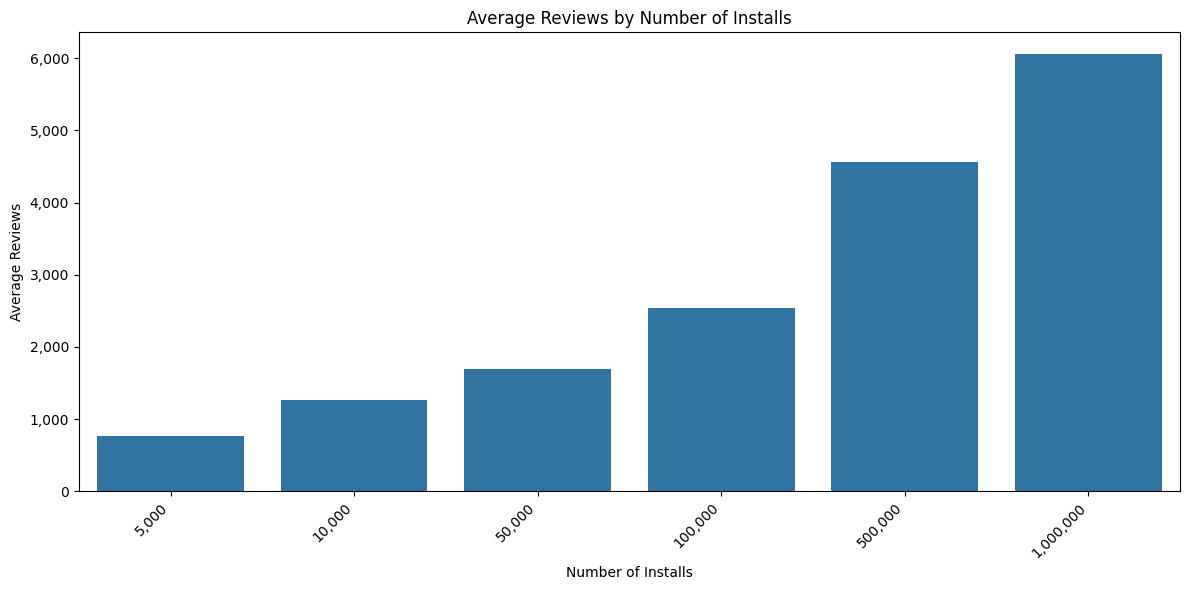

In [26]:
# Group by Installs and calculate mean Reviews
grouped_data = df_copy.groupby('Installs')['Reviews'].mean().reset_index()

# Create the visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Installs', y='Reviews')
plt.xticks(rotation=45, ha='right')
plt.title('Average Reviews by Number of Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Average Reviews')

# Format x-axis labels with comma separator for thousands
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(grouped_data['Installs'].iloc[int(x)]), ',')))


# Format y-axis labels with comma separator for thousands 
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()


Linear Regression Model:
Coefficient: 186.65
Intercept: -247455.80


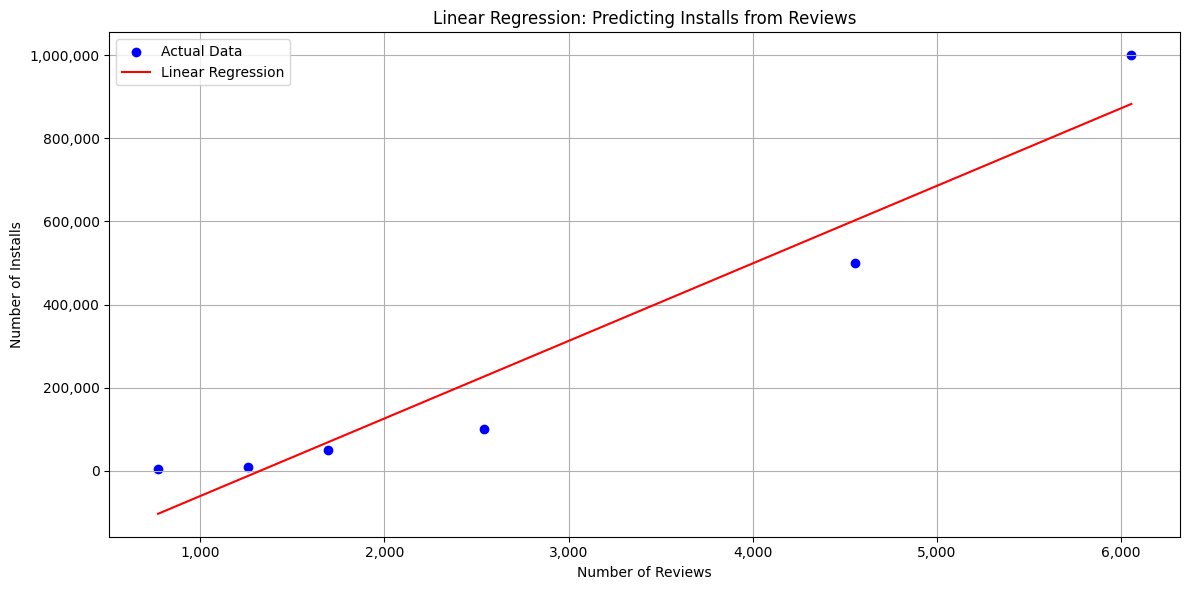


Model R² Score: 0.9339


In [27]:
# Prepare data for linear regression
X = grouped_data['Reviews'].values.reshape(-1, 1)  # Reviews is now X (predictor)
y = grouped_data['Installs'].values.reshape(-1, 1)  # Installs is now y (target)

# Create and fit linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Print model coefficients
print("Linear Regression Model:")
print(f"Coefficient: {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")

# Make predictions for a sample range of reviews
sample_reviews = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
predicted_installs = model.predict(sample_reviews)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(sample_reviews, predicted_installs, color='red', label='Linear Regression')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Installs')
plt.title('Linear Regression: Predicting Installs from Reviews')
plt.legend()
plt.grid(True)

# Format x-axis labels with comma separator for thousands
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Format y-axis labels with comma separator for thousands
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

# Print model score
print(f"\nModel R² Score: {model.score(X, y):.4f}")

In [30]:
# predict 5990 reviews
print(f"Predicted installs for 5990 reviews: {model.predict(np.array([5990]).reshape(-1, 1)).reshape(-1,1)[0][0]:,.0f}")

Predicted installs for 5990 reviews: 870,594
